In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import statistics
import pandas as pd
%matplotlib inline

In [2]:
def es_point(s,p):
    max_index=np.where(s[2]==np.amax(s[2]))
    max_index=max_index[0]+p
    return max_index[0]

In [3]:
def windowed(s,window_size):
    s1=[]
    sv=[]
    window_size=10
    for i in range(len(s[2])-window_size):
        d=s[2][i:i+window_size]
        dm=sum(d)/window_size
        s1.append(dm)
        dv=statistics.variance(d)
        sv.append(dv)
    return s1,sv

### local optimizor using Adam, Fed using FedAvg

In [4]:
basedir=os.path.join('aOLD/adam')
# os.listdir(basedir)

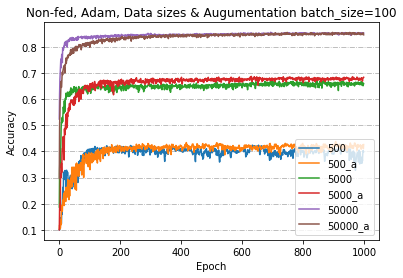

In [5]:
'''
# non-fed Adam
With different data size, batch size=100
The final convergence is related to data size, so in later tests we fix total data size to 5000
The augumentation method used here doesn't help much, so in later tests we will not use augument.
'''

s1=np.load(os.path.join(basedir,'500_central.npy'))

s2=np.load(os.path.join(basedir,'500_central_augument.npy'))
s3=np.load(os.path.join(basedir,'5000_central.npy'))
s4=np.load(os.path.join(basedir,'5000_central_augument.npy'))
s5=np.load(os.path.join(basedir,'50000_central.npy'))
s6=np.load(os.path.join(basedir,'50000_central_augument.npy'))
plt.plot(s1[0],s1[2], label='500')
plt.plot(s2[0],s2[2], label='500_a')
plt.plot(s3[0],s3[2], label='5000')
plt.plot(s4[0],s4[2], label='5000_a')
plt.plot(s5[0],s5[2], label='50000')
plt.plot(s6[0],s6[2], label='50000_a')

# plt.gcf().set_size_inches(12, 6)
plt.grid(axis="y",ls='-.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Non-fed, Adam, Data sizes & Augumentation batch_size=100')
plt.legend()

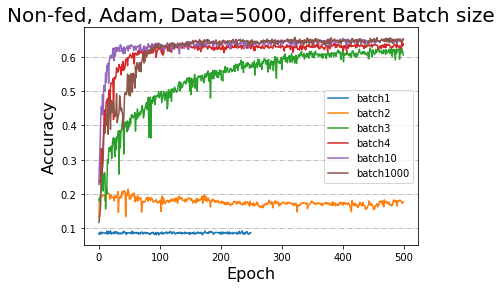

In [6]:
'''
# non-fed Adam

# When larger batch is slower:
Decreasing learning_rate can have similar effect as increasing batchsize.(https://arxiv.org/pdf/1711.00489.pdf)
So this is why larger batchsize converge slower and has more zigzag curve?
TODO: If case[more small nodes] can have smoother curve than case[less large nodes]?

# Some says larger batch is better, can have smoother curve? (not for this case, maybe it's within some range)
In our case batch_size=1 won't converge.
Because in each batch there's only one class, it's similar to strong non-iid in federated training...?
So since batch_size=5 works properly, the weak non-iid case of 5w/node will not decrease performance either?
If so, maybe I can choose batch_size=[1-9] for pre-simulating some of the non-iid fedML secnarios?
Or manually rank the input data and avoid shuffle?
(TODO: make sure how exactly adam works.. I think it's also average mini-batches..?)


In our case batch1000 converge slower than batch100.
So at least batch_size in [10-100] can work properly. In later tests we all choose batch_size=100.

'''
s1=np.load(os.path.join(basedir,'5000_central.batch1.npy'))
plt.plot(s1[0],s1[2], label='batch1')

s1=np.load(os.path.join(basedir,'5000_central.batch2.npy'))
plt.plot(s1[0],s1[2], label='batch2')

s1=np.load(os.path.join(basedir,'5000_central.batch3.npy'))
plt.plot(s1[0],s1[2], label='batch3')

s1=np.load(os.path.join(basedir,'5000_central.batch4.npy'))
plt.plot(s1[0],s1[2], label='batch4')

s1=np.load(os.path.join(basedir,'5000_central.batch5.npy'))
# plt.plot(s1[0],s1[2], label='batch5')

s1=np.load(os.path.join(basedir,'5000_central.batch10.npy'))
plt.plot(s1[0][:500],s1[2][:500], label='batch10')

s1=np.load(os.path.join(basedir,'5000_central.batch50.npy'))
# plt.plot(s1[0][:500],s1[2][:500], label='batch50')

s1=np.load(os.path.join(basedir,'5000_central.npy'))
# plt.plot(s1[0][:500],s1[2][:500], label='batch100')

s1=np.load(os.path.join(basedir,'5000_central.batch500.npy'))
# plt.plot(s1[0][:500],s1[2][:500], label='batch500')

s1=np.load(os.path.join(basedir,'5000_central.batch1000.npy'))
plt.plot(s1[0][:500],s1[2][:500], label='batch1000')

# plt.gcf().set_size_inches(12, 6)
plt.grid(axis="y",ls='-.')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Non-fed, Adam, Data=5000, different Batch size',fontsize=20)
plt.legend()

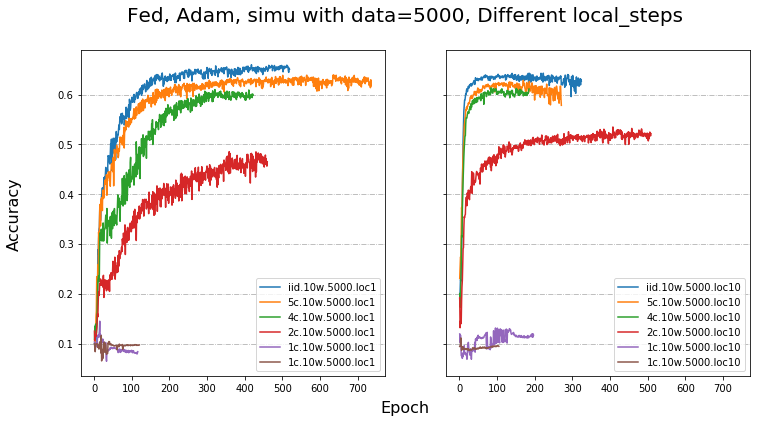

In [7]:
'''
Fed simu with data=5000, batch_size=100

'''

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 6)) 

fig.text(0.5, 0.04, 'Epoch', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical',fontsize=16)
fig.suptitle('Fed, Adam, simu with data=5000, Different local_steps',fontsize=20)

##################################### loc=1
iid1w=[
    'iid.10w.5000.loc1.earlystop100.20200305-205717.npy',
    'weak.5c.10w.5000.loc1.earlystop100.20200306-024012.npy',
    'weak.4c.10w.5000.loc1.earlystop100.20200305-182837.npy',
    'strong.2c.10w.5000.loc1.earlystop100.20200305-194220.npy',
    'strong.1c.10w.5000.loc1.earlystop100.20200305-102707.npy',
    'strong.1c.10w.5000.loc1.earlystop100.20200306-103040.npy'
]

lab1w=[
    'iid.10w.5000.loc1',
    '5c.10w.5000.loc1',
    '4c.10w.5000.loc1',
    '2c.10w.5000.loc1',
    '1c.10w.5000.loc1',
    '1c.10w.5000.loc1'
]

l=len(iid1w)

for i in range(l):
    s1=np.load(os.path.join(basedir,iid1w[i]))
    ax[0].plot(s1[0],s1[2], label=lab1w[i])

ax[0].grid(axis="y",ls='-.')
ax[0].legend()


##################################### loc=10
iid10w=[
    'iid.10w.5000.loc10.earlystop100.20200306-224652.npy',
    'weak.5c.10w.5000.loc10.earlystop100.20200306-193410.npy',
    'weak.4c.10w.5000.loc10.earlystop100.20200306-035118.npy',
    'strong.2c.10w.5000.loc10.earlystop100.20200307-072647.npy',
    'strong.1c.10w.5000.loc10.earlystop100.20200306-003026.npy',
    'strong.1c.10w.5000.loc10.earlystop100.20200306-163552.npy'
]

lab10w=[
    'iid.10w.5000.loc10',
    '5c.10w.5000.loc10',
    '4c.10w.5000.loc10',
    '2c.10w.5000.loc10',
    '1c.10w.5000.loc10',
    '1c.10w.5000.loc10'
]

l=len(iid10w)

for i in range(l):
    s1=np.load(os.path.join(basedir,iid10w[i]))
    ax[1].plot(s1[0],s1[2], label=lab10w[i])

ax[1].grid(axis="y",ls='-.')
ax[1].legend()


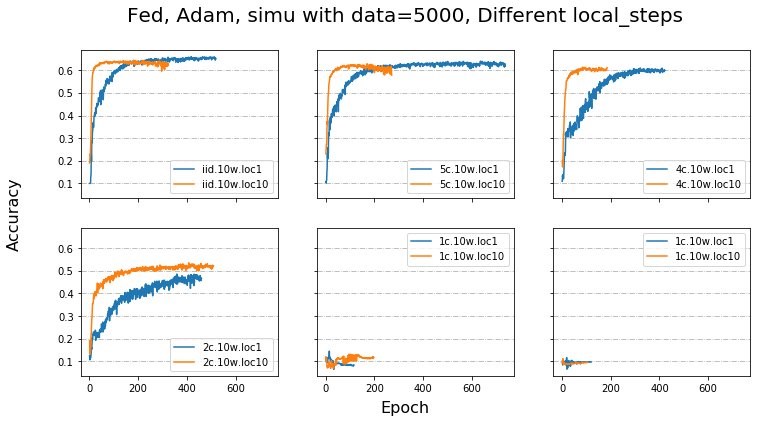

In [8]:
'''

'''
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12, 6))

fig.text(0.5, 0.04, 'Epoch', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical',fontsize=16)
fig.suptitle('Fed, Adam, simu with data=5000, Different local_steps',fontsize=20)


s1=np.load(os.path.join(basedir,'iid.10w.5000.loc1.earlystop100.20200305-205717.npy'))
ax[0, 0].plot(s1[0],s1[2], label='iid.10w.loc1')
s1=np.load(os.path.join(basedir,'iid.10w.5000.loc10.earlystop100.20200306-224652.npy'))
ax[0, 0].plot(s1[0],s1[2], label='iid.10w.loc10')
ax[0, 0].grid(axis="y",ls='-.')
ax[0, 0].legend()


s1=np.load(os.path.join(basedir,'weak.5c.10w.5000.loc1.earlystop100.20200306-024012.npy'))
ax[0, 1].plot(s1[0],s1[2], label='5c.10w.loc1')
s1=np.load(os.path.join(basedir,'weak.5c.10w.5000.loc10.earlystop100.20200306-193410.npy'))
ax[0, 1].plot(s1[0],s1[2], label='5c.10w.loc10')
ax[0, 1].grid(axis="y",ls='-.')
ax[0, 1].legend()


s1=np.load(os.path.join(basedir,'weak.4c.10w.5000.loc1.earlystop100.20200305-182837.npy'))
ax[0, 2].plot(s1[0],s1[2], label='4c.10w.loc1')
s1=np.load(os.path.join(basedir,'weak.4c.10w.5000.loc10.earlystop100.20200306-035118.npy'))
ax[0, 2].plot(s1[0],s1[2], label='4c.10w.loc10')
ax[0, 2].grid(axis="y",ls='-.')
ax[0, 2].legend()

s1=np.load(os.path.join(basedir,'strong.2c.10w.5000.loc1.earlystop100.20200305-194220.npy'))
ax[1, 0].plot(s1[0],s1[2], label='2c.10w.loc1')
s1=np.load(os.path.join(basedir,'strong.2c.10w.5000.loc10.earlystop100.20200307-072647.npy'))
ax[1, 0].plot(s1[0],s1[2], label='2c.10w.loc10')
ax[1, 0].grid(axis="y",ls='-.')
ax[1, 0].legend()


s1=np.load(os.path.join(basedir,'strong.1c.10w.5000.loc1.earlystop100.20200305-102707.npy'))
ax[1, 1].plot(s1[0],s1[2], label='1c.10w.loc1')
s1=np.load(os.path.join(basedir,'strong.1c.10w.5000.loc10.earlystop100.20200306-003026.npy'))
ax[1, 1].plot(s1[0],s1[2], label='1c.10w.loc10')
ax[1, 1].grid(axis="y",ls='-.')
ax[1, 1].legend()


s1=np.load(os.path.join(basedir,'strong.1c.10w.5000.loc1.earlystop100.20200306-103040.npy'))
ax[1, 2].plot(s1[0],s1[2], label='1c.10w.loc1')
s1=np.load(os.path.join(basedir,'strong.1c.10w.5000.loc10.earlystop100.20200306-163552.npy'))
ax[1, 2].plot(s1[0],s1[2], label='1c.10w.loc10')
ax[1, 2].grid(axis="y",ls='-.')
ax[1, 2].legend()

## Data Dispersion

In [9]:
basedir=os.path.join('DataDispersion')
os.listdir(basedir)

['2c.10W_4000.loc1.earlystop500.20200417-085230.npy',
 '2c.40W_4000.loc1.earlystop500.20200421-155338.npy',
 '2c.80W_4000.loc1.earlystop500.20200424-225252.npy',
 '5c.10W_4000.loc1.earlystop500.20200417-042135.npy',
 '5c.40W_4000.loc1.earlystop500.20200419-125703.npy',
 '5c.80W_4000.loc1.earlystop500.20200423-163133.npy',
 'iid.10W_4000.loc1.earlystop500.20200417-074006.npy',
 'iid.40W_4000.loc1.earlystop500.20200420-075052.npy',
 'iid.80W_4000.loc1.earlystop500.20200423-052557.npy']

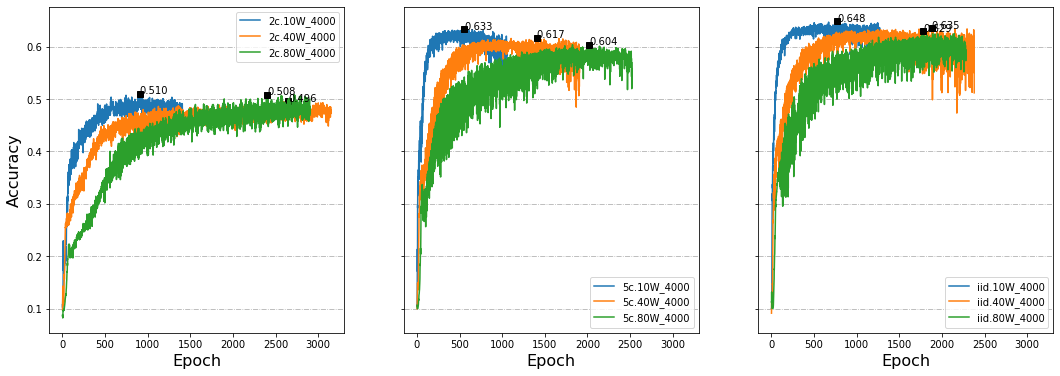

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6))

result=[
 '2c.10W_4000.loc1.earlystop500.20200417-085230.npy',
 '2c.40W_4000.loc1.earlystop500.20200421-155338.npy',
 '2c.80W_4000.loc1.earlystop500.20200424-225252.npy',
    
 '5c.10W_4000.loc1.earlystop500.20200417-042135.npy',
 '5c.40W_4000.loc1.earlystop500.20200419-125703.npy',
 '5c.80W_4000.loc1.earlystop500.20200423-163133.npy',
    
 'iid.10W_4000.loc1.earlystop500.20200417-074006.npy',
 'iid.40W_4000.loc1.earlystop500.20200420-075052.npy',
 'iid.80W_4000.loc1.earlystop500.20200423-052557.npy',
]

lab=[
 '2c.10W_4000',
 '2c.40W_4000',
 '2c.80W_4000',
    
 '5c.10W_4000',
 '5c.40W_4000',
 '5c.80W_4000',
    
 'iid.10W_4000',
 'iid.40W_4000',
 'iid.80W_4000',
] 
for i in range(3):
    
    
    for j in range(3):
        s1=np.load(os.path.join(basedir,result[i*3+j]))
        p=es_point(s1,500)
        ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i*3+j])
        index_max=np.argmax(s1[2])
        ax[i].plot(index_max,s1[2][index_max],'ks')
        ax[i].annotate('{:.3f}'.format(s1[2][index_max]),
                       xytext=(index_max,s1[2][index_max]),
                       xy=(index_max,s1[2][index_max])
                      )
    
    
    ax[i].set_xlabel('Epoch',fontsize=16)
    ax[i].grid(axis="y",ls='-.')
    ax[0].set_ylabel('Accuracy',fontsize=16)
    ax[i].legend() 

## Bad Node

In [11]:
basedir=os.path.join('BadNode')
os.listdir(basedir)

['11d.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-020918.npy',
 '11d.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-060927.npy',
 '2c.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-015142.npy',
 '2c.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-031558.npy',
 '5c.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-023155.npy',
 '5c.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-004052.npy',
 'bad2c40',
 'bad2c400',
 'bad5c40',
 'bad5c400',
 'badiid40',
 'badiid400',
 'plot_selfEVL.ipynb']

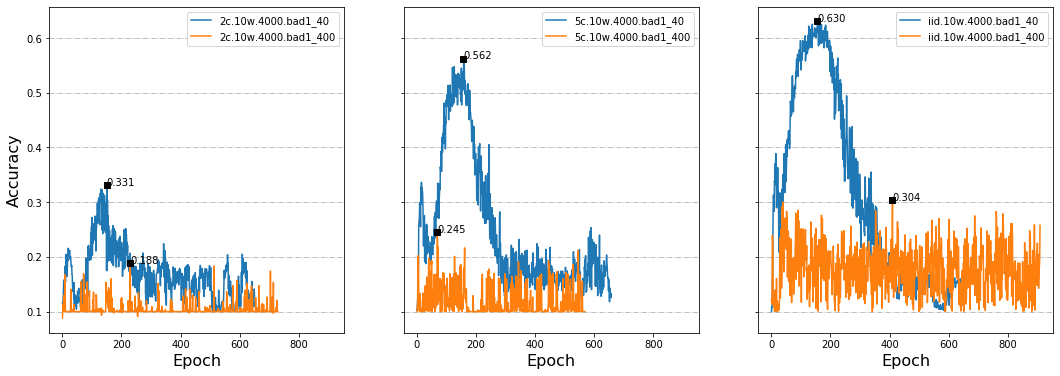

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6))

result=[
 '2c.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-015142.npy',
 '2c.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-031558.npy',
 '5c.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-023155.npy',
 '5c.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-004052.npy',
 '11d.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-020918.npy',
 '11d.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-060927.npy'
       ]

lab=[
 '2c.10w.4000.bad1_40',
 '2c.10w.4000.bad1_400',
 '5c.10w.4000.bad1_40',
 '5c.10w.4000.bad1_400',
 'iid.10w.4000.bad1_40',
 'iid.10w.4000.bad1_400'
       ]
for i in range(3):
    
    for j in range(2):
        s1=np.load(os.path.join(basedir,result[i*2+j]))
        p=es_point(s1,500)
        ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i*2+j])
        index_max=np.argmax(s1[2])
        ax[i].plot(index_max,s1[2][index_max],'ks')
        ax[i].annotate('{:.3f}'.format(s1[2][index_max]),
                       xytext=(index_max,s1[2][index_max]),
                       xy=(index_max,s1[2][index_max])
                      )
    
    
    ax[i].set_xlabel('Epoch',fontsize=16)
    ax[i].grid(axis="y",ls='-.')
    ax[0].set_ylabel('Accuracy',fontsize=16)
    ax[i].legend() 

## Local Steps

In [13]:
basedir=os.path.join('LocalStep')
os.listdir(basedir)

['2c.10w.4000.loc1.earlystop500.20200501-072809.npy',
 '2c.10w.4000.loc10.earlystop500.20200502-105042.npy',
 '5c.10w.4000.loc1.earlystop500.20200501-024326.npy',
 '5c.10w.4000.loc10.earlystop500.20200501-203358.npy',
 'iid.10w.4000.loc1.earlystop500.20200501-020117.npy',
 'iid.10w.4000.loc10.earlystop500.20200502-151734.npy',
 'loc2c10s',
 'loc2c1s',
 'loc5c10s',
 'loc5c1s',
 'lociid10s',
 'lociid1s']

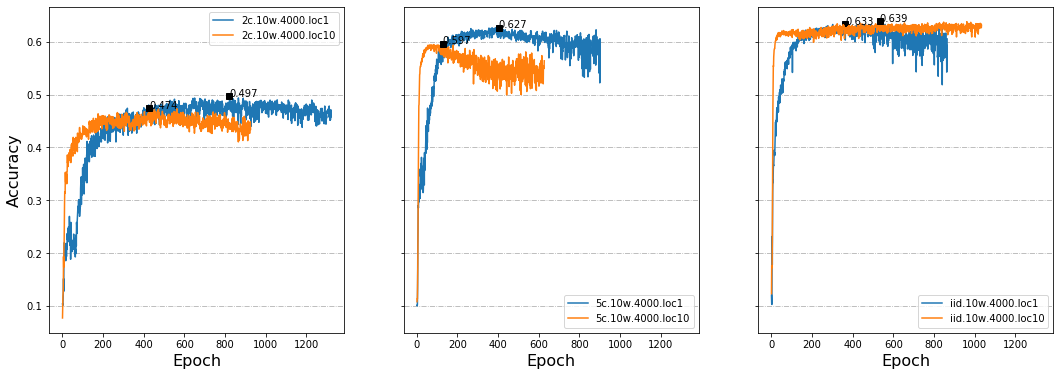

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6))

result=[
'2c.10w.4000.loc1.earlystop500.20200501-072809.npy',
'2c.10w.4000.loc10.earlystop500.20200502-105042.npy',
'5c.10w.4000.loc1.earlystop500.20200501-024326.npy',
'5c.10w.4000.loc10.earlystop500.20200501-203358.npy',
'iid.10w.4000.loc1.earlystop500.20200501-020117.npy',
'iid.10w.4000.loc10.earlystop500.20200502-151734.npy'
]

lab=[
    '2c.10w.4000.loc1',
    '2c.10w.4000.loc10',
    '5c.10w.4000.loc1',
    '5c.10w.4000.loc10',
    'iid.10w.4000.loc1',
    'iid.10w.4000.loc10'
]


x = 2
for i in range(3):
    
    for j in range(x):
        s1=np.load(os.path.join(basedir,result[i*x+j]))
        p=es_point(s1,500)
        ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i*x+j])
        index_max=np.argmax(s1[2])
        ax[i].plot(index_max,s1[2][index_max],'ks')
        ax[i].annotate('{:.3f}'.format(s1[2][index_max]),
                       xytext=(index_max,s1[2][index_max]),
                       xy=(index_max,s1[2][index_max])
                      )
    
    
    ax[i].set_xlabel('Epoch',fontsize=16)
    ax[i].grid(axis="y",ls='-.')
    ax[0].set_ylabel('Accuracy',fontsize=16)
    ax[i].legend() 

## Share Data

In [15]:
basedir=os.path.join('ShareData')
os.listdir(basedir)

['1c.10w.4000.share100.epo_iid.loc1.earlystop500.20200502-044312.npy',
 '1c.10w.4000.share100.loc1.earlystop500.20200501-214132.npy',
 '1c.10w.4000.share400.epo_iid.loc1.earlystop500.20200502-182749.npy',
 '1c.10w.4000.share400.loc1.earlystop500.20200502-043110.npy',
 '1c.10w.4000.share800.loc1.earlystop500.20200502-154752.npy',
 '1c.10w.8000.share100.loc1.earlystop500.20200501-224713.npy',
 '1c.10w.8000.share400.loc1.earlystop500.20200502-141458.npy',
 '1c.40w.4000.share100.loc1.earlystop500.20200502-143313.npy',
 'iid.10w.4000.share100.loc1.earlystop500.20200502-075909.npy',
 'iid.10w.4000.share400.loc1.earlystop500.20200502-084100.npy',
 'sdes1',
 'sdes4',
 'sdiid1',
 'sdiid4',
 'sdn40ws100',
 'sdns1',
 'sdns4',
 'sdns8',
 'sssdn1',
 'sssdn4']

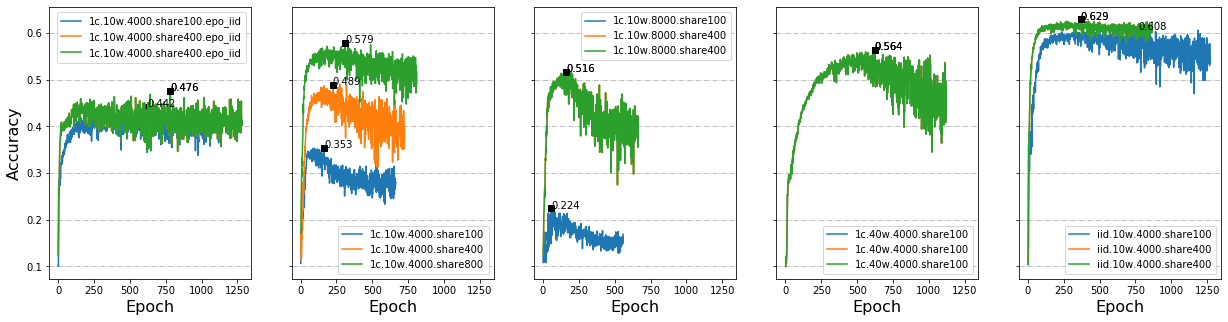

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(21, 5))


result=[
    '1c.10w.4000.share100.epo_iid.loc1.earlystop500.20200502-044312.npy',
    '1c.10w.4000.share400.epo_iid.loc1.earlystop500.20200502-182749.npy',
    '1c.10w.4000.share400.epo_iid.loc1.earlystop500.20200502-182749.npy',
    
    '1c.10w.4000.share100.loc1.earlystop500.20200501-214132.npy',
    '1c.10w.4000.share400.loc1.earlystop500.20200502-043110.npy',
    '1c.10w.4000.share800.loc1.earlystop500.20200502-154752.npy',
    
    '1c.10w.8000.share100.loc1.earlystop500.20200501-224713.npy',
    '1c.10w.8000.share400.loc1.earlystop500.20200502-141458.npy',
    '1c.10w.8000.share400.loc1.earlystop500.20200502-141458.npy',
    
    
    '1c.40w.4000.share100.loc1.earlystop500.20200502-143313.npy',
    '1c.40w.4000.share100.loc1.earlystop500.20200502-143313.npy',
    '1c.40w.4000.share100.loc1.earlystop500.20200502-143313.npy',
    
    
    'iid.10w.4000.share100.loc1.earlystop500.20200502-075909.npy',
    'iid.10w.4000.share400.loc1.earlystop500.20200502-084100.npy',
    'iid.10w.4000.share400.loc1.earlystop500.20200502-084100.npy'

       ]

for i in range(5):
    
    s1=np.load(os.path.join(basedir,result[-1]))   #改一下， xx class 的non-delay 版本 & 重新跑test if it overfits on delayed or non-delayed part?
#     p=es_point(s1,500)
#     ax[i].plot(s1[0][:p],s1[2][:p], label=lab[-1])
    
    for j in range(3):
        s1=np.load(os.path.join(basedir,result[i*3+j]))
        p=es_point(s1,500)
        ax[i].plot(s1[0][:p],s1[2][:p], label=result[i*3+j][:-38]) ########!!!!
        index_max=np.argmax(s1[2])
        ax[i].plot(index_max,s1[2][index_max],'ks')
        ax[i].annotate('{:.3f}'.format(s1[2][index_max]),
                       xytext=(index_max,s1[2][index_max]),
                       xy=(index_max,s1[2][index_max])
                      )
    
    
    ax[i].set_xlabel('Epoch',fontsize=16)
    ax[i].grid(axis="y",ls='-.')
    ax[0].set_ylabel('Accuracy',fontsize=16)
    ax[i].legend() 


## Late update in some node

In [17]:
basedir=os.path.join('DelayUpdate')
os.listdir(basedir)

['2c.40w.4000.dly20.speed3.loc1.earlystop500.20200502-160017.npy',
 '2c.40w.4000.dly32.speed3.loc1.earlystop500.20200430-223516.npy',
 '2c.40w.4000.dly8.speed12.loc1.earlystop500.20200502-161123.npy',
 '5c.40w.4000.dly8.speed12.loc1.earlystop500.20200502-171548.npy',
 '5c.40w.4000.dly8.speed3.loc1.earlystop500.20200502-160044.npy',
 '5c.40w.4000.dly8.speed30.loc1.earlystop500.20200502-182343.npy',
 'du2c2',
 'du2c3',
 'du2c4',
 'du5c1',
 'du5c4',
 'du5c5',
 'duiid1',
 'duiid3',
 'duiid4',
 'iid.40w.4000.dly32.speed3.loc1.earlystop500.20200502-184247.npy',
 'iid.40w.4000.dly8.speed12.loc1.earlystop500.20200502-133739.npy',
 'iid.40w.4000.dly8.speed3.loc1.earlystop500.20200502-193120.npy']

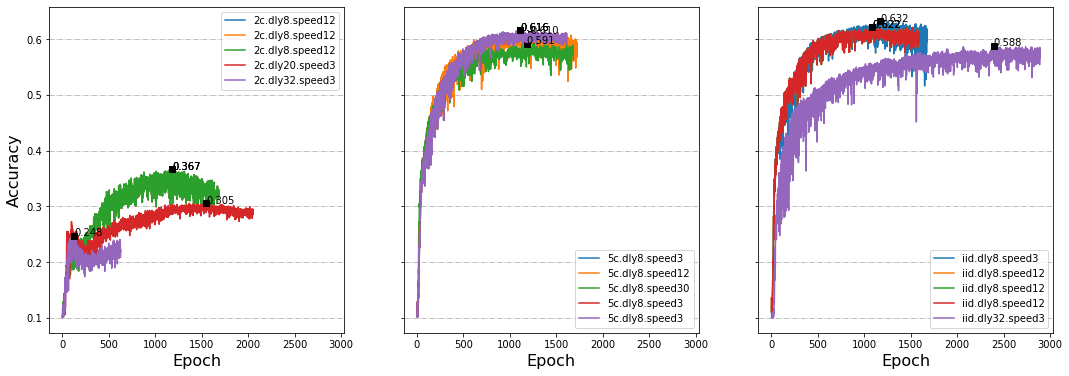

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6))

# in order: dly8-30/12/3, dly20, dly32
result=[
    '2c.40w.4000.dly8.speed12.loc1.earlystop500.20200502-161123.npy',
    '2c.40w.4000.dly8.speed12.loc1.earlystop500.20200502-161123.npy',
    '2c.40w.4000.dly8.speed12.loc1.earlystop500.20200502-161123.npy',
    '2c.40w.4000.dly20.speed3.loc1.earlystop500.20200502-160017.npy',
    '2c.40w.4000.dly32.speed3.loc1.earlystop500.20200430-223516.npy',
    
    
    '5c.40w.4000.dly8.speed3.loc1.earlystop500.20200502-160044.npy',
    '5c.40w.4000.dly8.speed12.loc1.earlystop500.20200502-171548.npy',
    '5c.40w.4000.dly8.speed30.loc1.earlystop500.20200502-182343.npy',
    '5c.40w.4000.dly8.speed3.loc1.earlystop500.20200502-160044.npy',
    '5c.40w.4000.dly8.speed3.loc1.earlystop500.20200502-160044.npy',
    
    
    'iid.40w.4000.dly8.speed3.loc1.earlystop500.20200502-193120.npy',
    'iid.40w.4000.dly8.speed12.loc1.earlystop500.20200502-133739.npy',
    'iid.40w.4000.dly8.speed12.loc1.earlystop500.20200502-133739.npy',
    'iid.40w.4000.dly8.speed12.loc1.earlystop500.20200502-133739.npy',
    'iid.40w.4000.dly32.speed3.loc1.earlystop500.20200502-184247.npy'
    
]

lab=[
    '2c.dly8.speed12',
    '2c.dly8.speed12',
    '2c.dly8.speed12',
    '2c.dly20.speed3',
    '2c.dly32.speed3',
    
    
    '5c.dly8.speed3',
    '5c.dly8.speed12',
    '5c.dly8.speed30',
    '5c.dly8.speed3',
    '5c.dly8.speed3',
    
    
    'iid.dly8.speed3',
    'iid.dly8.speed12',
    'iid.dly8.speed12',
    'iid.dly8.speed12',
    'iid.dly32.speed3'
    
] 
for i in range(3):
    
    s1=np.load(os.path.join(basedir,result[-1]))   #改一下， xx class 的non-delay 版本 & 重新跑test if it overfits on delayed or non-delayed part?
#     p=es_point(s1,500)
#     ax[i].plot(s1[0][:p],s1[2][:p], label=lab[-1])
    
    for j in range(5):
#         j = j+2
        s1=np.load(os.path.join(basedir,result[i*5+j]))
        p=es_point(s1,500)
        ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i*5+j])
        index_max=np.argmax(s1[2])
        ax[i].plot(index_max,s1[2][index_max],'ks')
        ax[i].annotate('{:.3f}'.format(s1[2][index_max]),
                       xytext=(index_max,s1[2][index_max]),
                       xy=(index_max,s1[2][index_max])
                      )
    
    
    ax[i].set_xlabel('Epoch',fontsize=16)
    ax[i].grid(axis="y",ls='-.')
    ax[0].set_ylabel('Accuracy',fontsize=16)
    ax[i].legend() 


## Evaluate by node

In [19]:
basedir=os.path.join('EvalTest')
os.listdir(basedir)

['2c.10w.4000_node_EVL.loc1.earlystop500.20200502-172929.npy',
 '5c.10w.4000_node_EVL.loc1.earlystop500.20200502-092327.npy',
 'evl2c',
 'evl5c',
 'evliid',
 'iid.10w.4000_node_EVL.loc1.earlystop500.20200502-141431.npy']

In [20]:
def plot_line(files,i,linelab):
    fileset = pd.concat( [pd.read_csv(f,header=None,sep=' ',names=['loss','acc'])['acc'] for f in files], axis=1)
    set_mean = fileset.mean(axis=1)
    set_plt = [i for i in range(len(set_mean))]
    ax[i].plot(set_plt,set_mean,label=linelab)

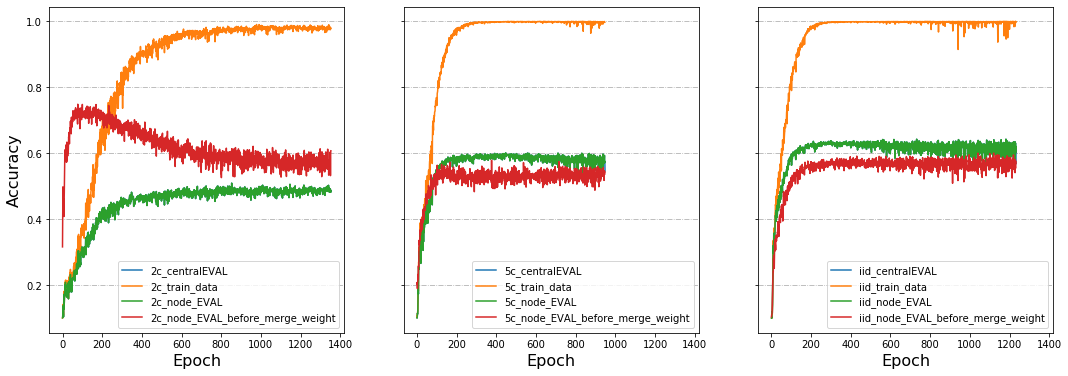

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6))


result=[
    '2c.10w.4000_node_EVL.loc1.earlystop500.20200502-172929.npy',
    '5c.10w.4000_node_EVL.loc1.earlystop500.20200502-092327.npy',
    'iid.10w.4000_node_EVL.loc1.earlystop500.20200502-141431.npy',
    'evl2c',
    'evl5c',
    'evliid'
]

lab=[
    '2c',
    '5c',
    'iid'   
]
for i in range(3):
    s1=np.load(os.path.join(basedir,result[i]))
    ax[i].plot(s1[0],s1[2], label=lab[i]+'_centralEVAL')
    
    files = glob.glob(basedir +'/'+result[i+3]+ '/worker_nodes/*/self_EVAL.txt')
    linelab = lab[i]+'_train_data'
    plot_line(files,i,linelab)

    files = glob.glob(basedir +'/'+result[i+3]+ '/worker_nodes/*/node_EVAL_before_training.txt')
    linelab = lab[i]+'_node_EVAL'
    plot_line(files,i,linelab)
    
    files = glob.glob(basedir +'/'+result[i+3]+ '/worker_nodes/*/node_EVAL_after_training.txt')
    linelab = lab[i]+'_node_EVAL_before_merge_weight'
    plot_line(files,i,linelab)

    
    
    ax[i].set_xlabel('Epoch',fontsize=16)
    ax[i].grid(axis="y",ls='-.')
    ax[0].set_ylabel('Accuracy',fontsize=16)
    ax[i].legend() 